(3, 1)
(3, 1)
(3, 1000)


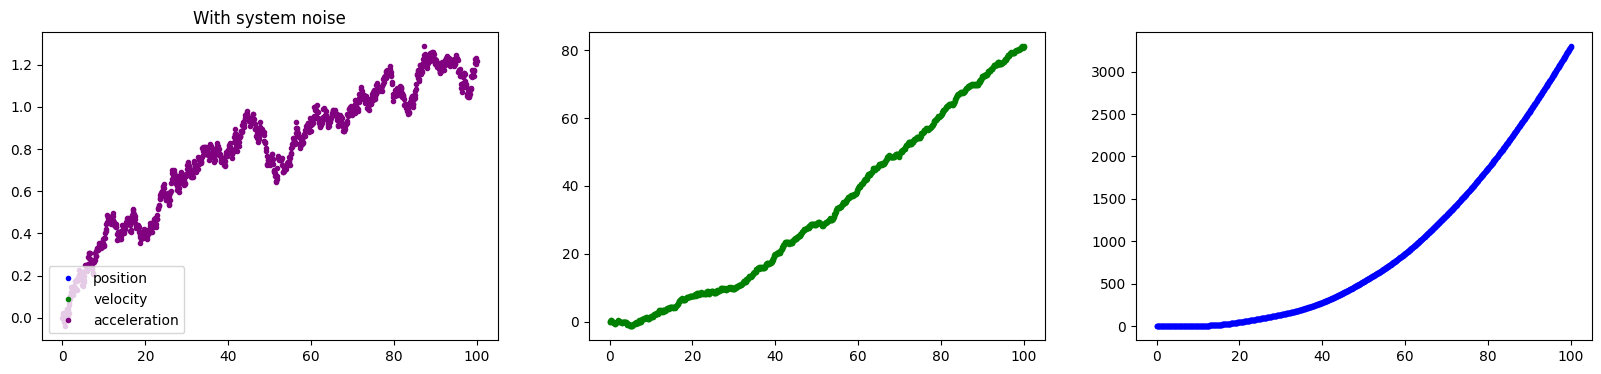

In [27]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

l = 1000 # 1000 time steps
t = np.linspace(0, 100, l) # a time interval of 100 seconds
a = np.zeros(1000) # initialize accelaration
v = np.zeros(1000) # initialize velocity
s = np.zeros(1000) # initialize position

variance_Zs = 0 # /sigma_Zs^2 =11.1 # variance of system error with respect to position
variance_Zv = 0.2 # /sigma_Zv^2 =11.1 # variance of system error with respect to velocity
variance_Za = 0.02 # /sigma_Za^2 =11.1 # variance of system error with respect to acceleration
variance_Ms = 2 # /sigma_Ms^2 = 20 # variance of measurement error with respect to position
variance_Mv = 0.2 # /sigma_Ms^2 = 20 # variance of measurement error with respect to velocity
variance_Ma = 0 # /sigma_Ma^2 =0.2 # variance of measurement error with respect to acceleration
noise_Zs = np.random.normal(0,variance_Zs,1000)
noise_Zv = np.random.normal(0,variance_Zv,1000) 
noise_Za = np.random.normal(0,variance_Za,1000) 
noise_Ms = np.random.normal(0,variance_Ms,1000)  
noise_Mv = np.random.normal(0,variance_Mv,1000)
noise_Ma = np.random.normal(0,variance_Ma,1000)

Ts = 100/l

Ad = np.matrix([[1,Ts,0.5*(Ts*Ts)],
                  [0,1,Ts],
                  [0,0,1]])

G = np.matrix ([[1,0,0],[0,1,0],[0,0,1]])
Gd = Ad * G

z = np.vstack((noise_Zs,noise_Zv,noise_Za))

StateMatrix = np.zeros((3,1000))

x = np.array ([[s[0]],[v[0]],[a[0]]])
z_0 = z[:,0].reshape (3,1)
print (x.shape)
print (z_0.shape)

StateMatrix[:,0] = np.squeeze(x)
for k in range(0, len(t)-1):
      z_k = z[:,k].reshape (3,1)
      x = Ad * x+  Gd * z_k
      StateMatrix[:,k+1] = np.squeeze(x)

print (StateMatrix.shape)

row1 = StateMatrix[0]
row2 = StateMatrix[1]
row3 = StateMatrix[2]

fig, axs = plt.subplots(1,3,figsize=(20,4))
axs[0].set_title("With system noise")
#axs.set_xlabel('time')
#plt.ylabel("Calorie Burnage")
line1, = axs[2].plot(t, row1 , '.', color='blue', label='position')
line2, = axs[1].plot(t, row2 , '.', color='green', label='velocity')
line3, = axs[0].plot(t, row3 , '.', color='purple', label='acceleration')
axs[0].legend(handles=[line1,line2,line3,], loc='lower left')
      